<a href="https://colab.research.google.com/github/SMSinclair/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Stephen_Sinclair_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
# TODO

import pandas as pd

# Load the data into a pandas dataframe
# Add informative names to the features

column_headers = ['age_at_operation', 'year_of_operation', 'positive_aux_nodes', 'survival_status']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=column_headers)
df.head()

# 1. Age of patient at time of operation (numerical) 
# 2. Patient's year of operation (year - 1900, numerical) 
# 3. Number of positive axillary nodes detected (numerical) 
# 4. Survival status (class attribute) 
# -- 1 = the patient survived 5 years or longer 
# -- 2 = the patient died within 5 year

,age_at_operation,year_of_operation,positive_aux_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
# Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).

# According to UCI, there should be 306 observations and 3 numerical attributes
# and one "class attribute"

df.shape

(306, 4)

In [3]:
# Validate that you have no missing values.

# There are no missing values listed below, and this is confirmed by the 
# abstract on UCI.

df.isnull().sum()

age_at_operation      0
year_of_operation     0
positive_aux_nodes    0
survival_status       0
dtype: int64

In [4]:
# The survival variable is encoded as 1 for surviving >5 years and 2 for not - 
# change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a 
# more traditional encoding of binary variables)

d = {2:0}
df.survival_status = df.survival_status.replace(d)
df.survival_status.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    0
9    1
Name: survival_status, dtype: int64

In [5]:
# At the end, print the first five rows of the dataset to demonstrate the above.
df.head()

,age_at_operation,year_of_operation,positive_aux_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
df.survival_status.value_counts()

1    225
0     81
Name: survival_status, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [68]:
# TODO

#create at least 2 tables

# Summary statistics

df.describe()

,age_at_operation,year_of_operation,positive_aux_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
time_bins = pd.cut(df['age_at_operation'], 5)

In [70]:
ct = pd.crosstab(df['survival_status'], df['binned_age'])
ct

binned_age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
survival_status,,,,,
0,4,31,27,16,3
1,39,68,69,43,6


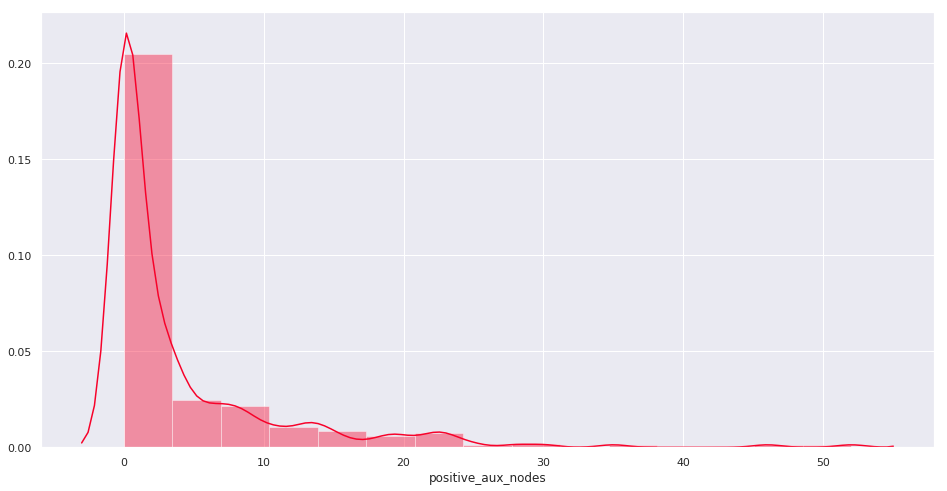

In [71]:
# Histogram of positive auxiliary nodes

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(df['positive_aux_nodes'], color=sns.xkcd_rgb["cherry red"], bins=15);

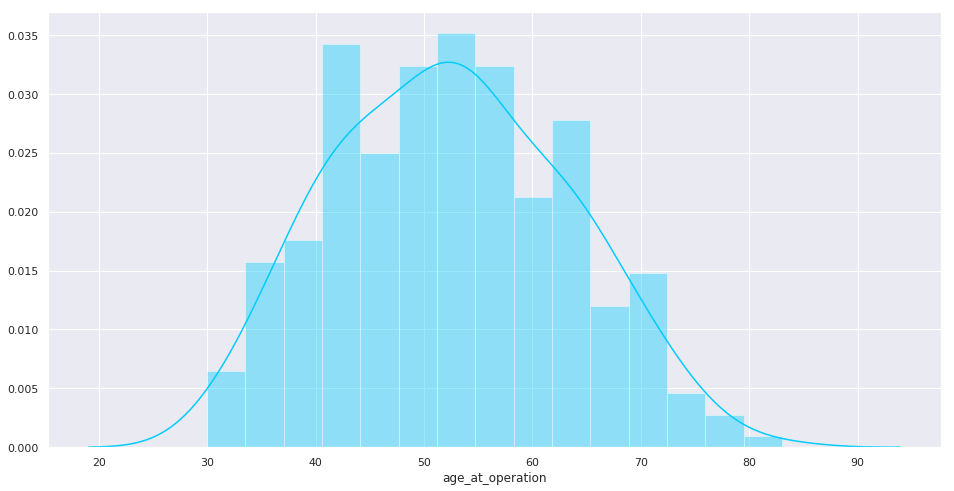

In [72]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(df['age_at_operation'], color=sns.xkcd_rgb["bright sky blue"], bins=15);

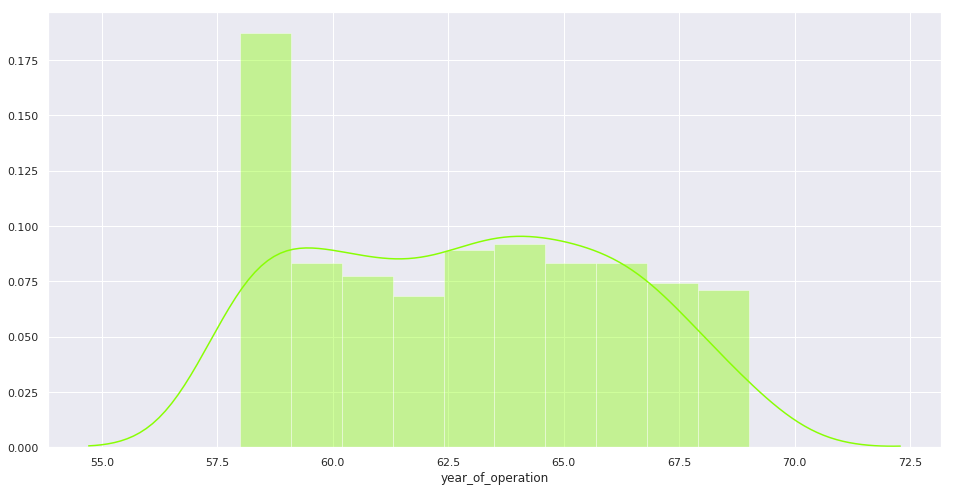

In [73]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(df['year_of_operation'], color=sns.xkcd_rgb["lime green"], bins=10);

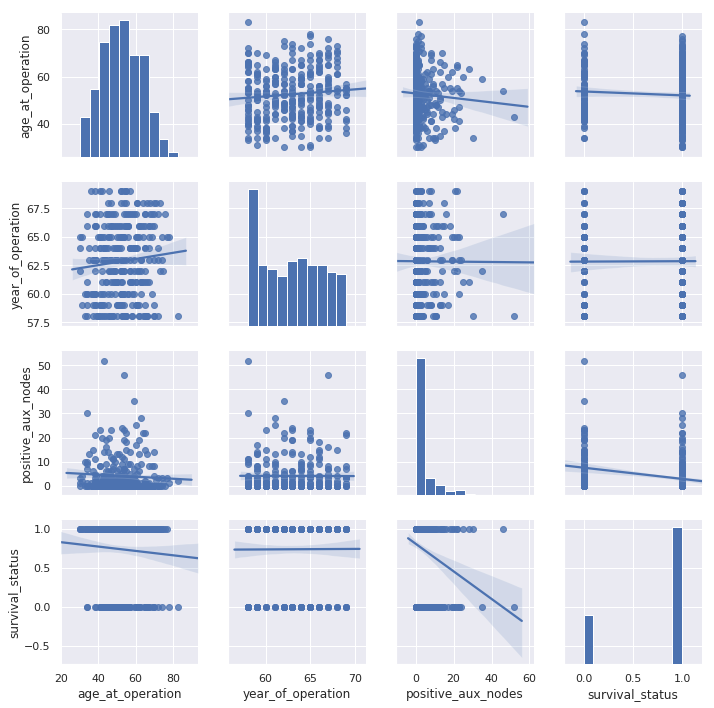

In [74]:
# Pair plot

sns.pairplot(df, kind='reg')

In [75]:
#!pip install pandas==0.23.4
time_bins = pd.cut(df['age_at_operation'], 8)  # 5 equal-sized bins
pd.crosstab(df['survival_status'], time_bins, normalize='columns')

age_at_operation,"(29.947, 36.625]","(36.625, 43.25]","(43.25, 49.875]","(49.875, 56.5]","(56.5, 63.125]","(63.125, 69.75]","(69.75, 76.375]","(76.375, 83.0]"
survival_status,,,,,,,,
0,0.111111,0.2,0.352941,0.30137,0.232143,0.28125,0.222222,0.666667
1,0.888889,0.8,0.647059,0.69863,0.767857,0.71875,0.777778,0.333333


In [76]:
time_bins.value_counts()

(49.875, 56.5]      73
(56.5, 63.125]      56
(36.625, 43.25]     55
(43.25, 49.875]     51
(63.125, 69.75]     32
(69.75, 76.375]     18
(29.947, 36.625]    18
(76.375, 83.0]       3
Name: age_at_operation, dtype: int64

In [77]:
time_bins = pd.cut(df['year_of_operation'], 5)  # 5 equal-sized bins
pd.crosstab(df['survival_status'], time_bins, normalize='columns')

year_of_operation,"(57.989, 60.2]","(60.2, 62.4]","(62.4, 64.6]","(64.6, 66.8]","(66.8, 69.0]"
survival_status,,,,,
0,0.274725,0.204082,0.262295,0.339286,0.22449
1,0.725275,0.795918,0.737705,0.660714,0.77551


In [78]:
time_bins.value_counts()

(57.989, 60.2]    91
(62.4, 64.6]      61
(64.6, 66.8]      56
(66.8, 69.0]      49
(60.2, 62.4]      49
Name: year_of_operation, dtype: int64

In [90]:
bins = [0,1,2,3,4,5,6,8,10,41.6]
time_bins = pd.cut(df['positive_aux_nodes'], bins)  # 5 equal-sized bins
pd.crosstab(df['survival_status'], time_bins, normalize='columns')

positive_aux_nodes,"(0.0, 1.0]","(1.0, 2.0]","(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]","(5.0, 6.0]","(6.0, 8.0]","(8.0, 10.0]","(10.0, 41.6]"
survival_status,,,,,,,,,
0,0.195122,0.25,0.35,0.230769,0.666667,0.428571,0.285714,0.555556,0.578947
1,0.804878,0.75,0.65,0.769231,0.333333,0.571429,0.714286,0.444444,0.421053


In [80]:
time_bins.value_counts()

(0.0, 2.0]      61
(10.0, 41.6]    38
(2.0, 4.0]      33
(6.0, 8.0]      14
(4.0, 6.0]      13
(8.0, 10.0]      9
Name: positive_aux_nodes, dtype: int64

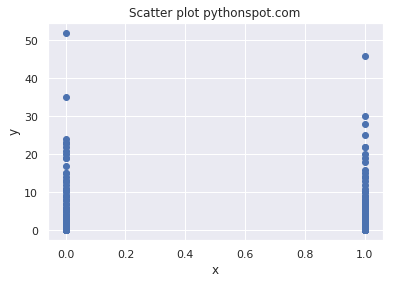

In [81]:
plt.scatter(df.survival_status, df.positive_aux_nodes)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

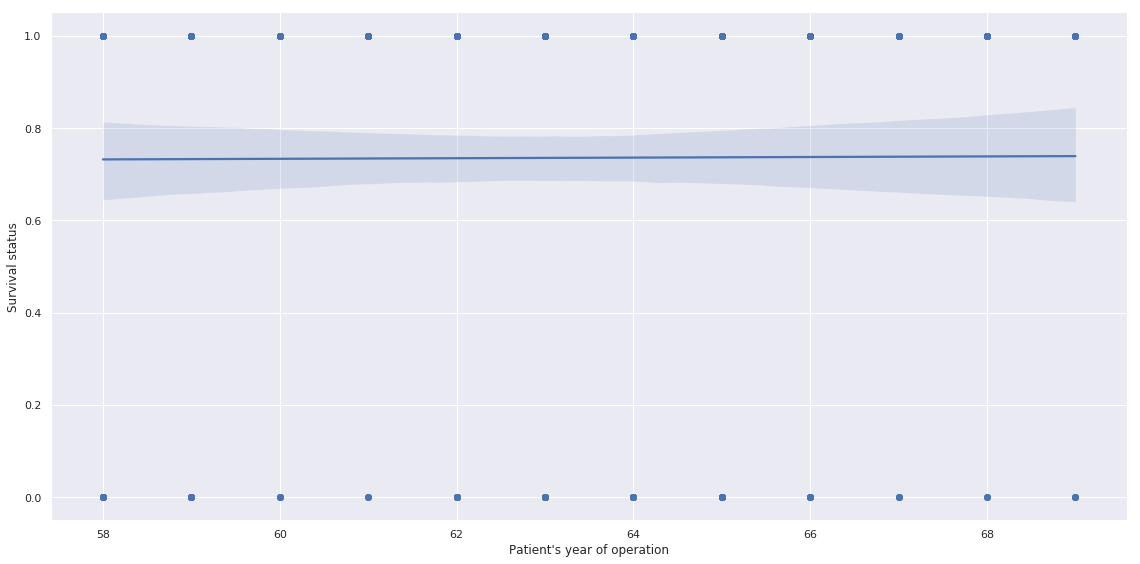

In [88]:
g = sns.lmplot(x="year_of_operation", y="survival_status",
               truncate=True, data=df, height=8, aspect=2)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Patient's year of operation", "Survival status");

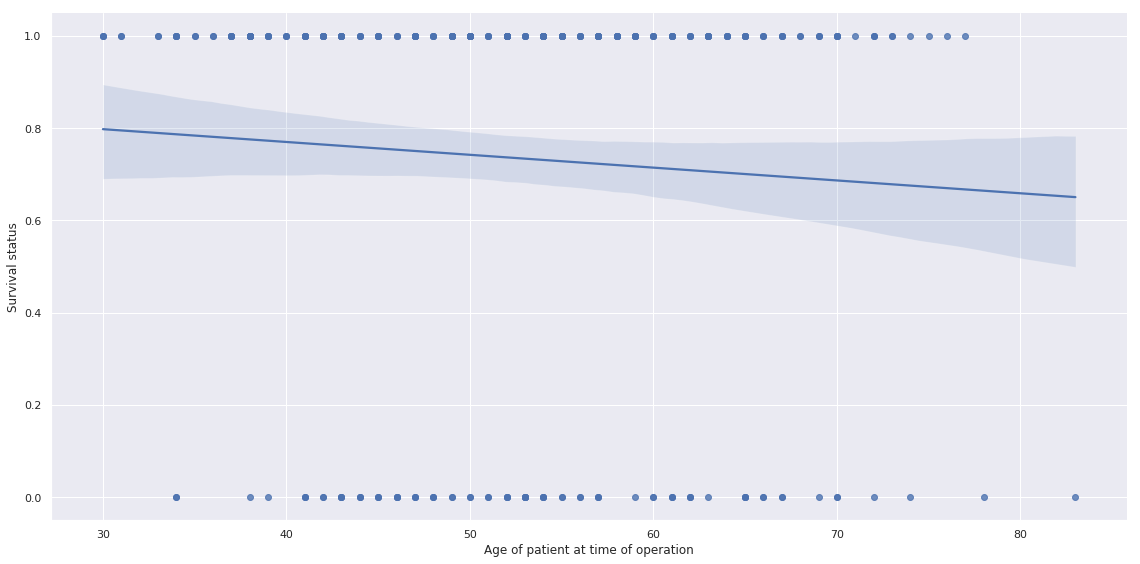

In [87]:
g = sns.lmplot(x="age_at_operation", y="survival_status",
               truncate=True, data=df, height=8, aspect=2)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Age of patient at time of operation", "Survival status");

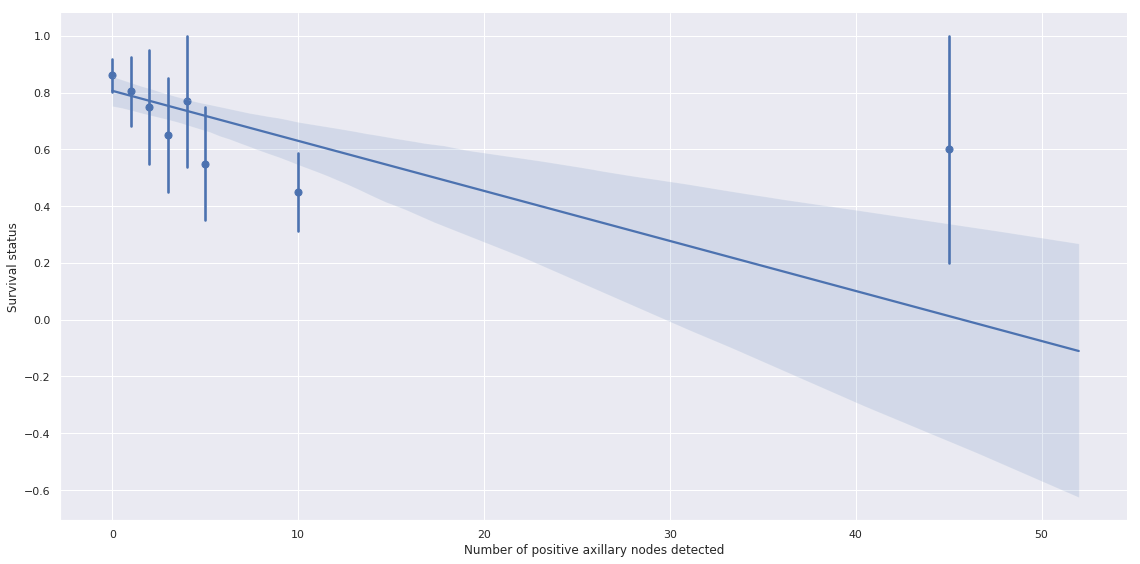

In [92]:
g = sns.lmplot(x="positive_aux_nodes", y="survival_status", x_bins=[0,1,2,3,4,5,10,45],
               truncate=True, data=df, height=8, aspect=2)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Number of positive axillary nodes detected", "Survival status");

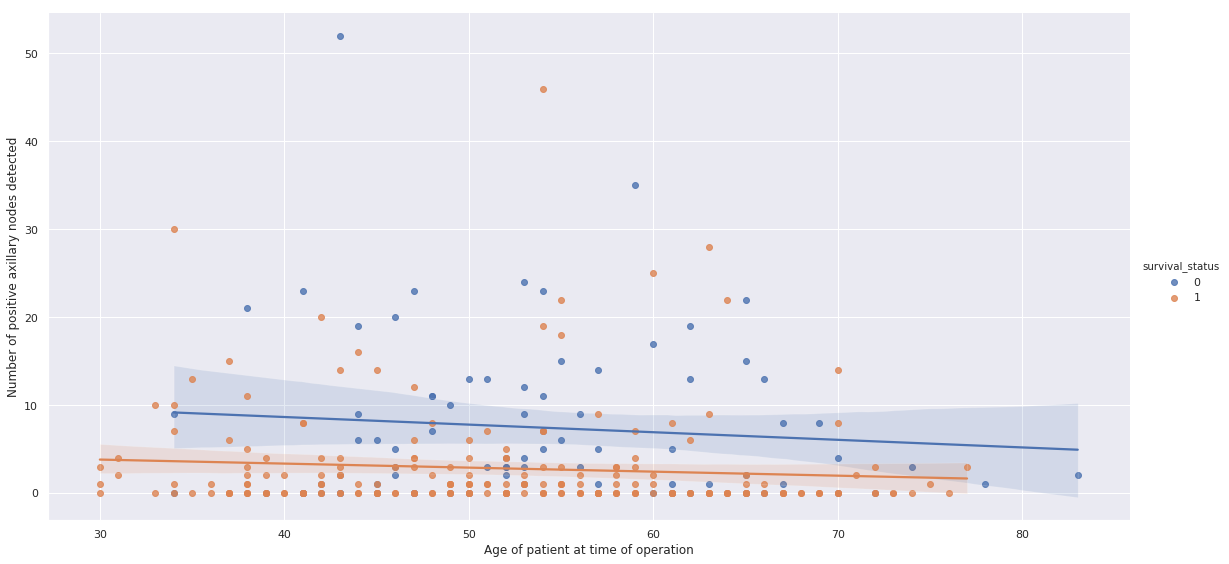

In [84]:
g = sns.lmplot(x="age_at_operation", y="positive_aux_nodes", hue="survival_status",
               truncate=True, data=df, height=8, aspect=2)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Age of patient at time of operation", "Number of positive axillary nodes detected");

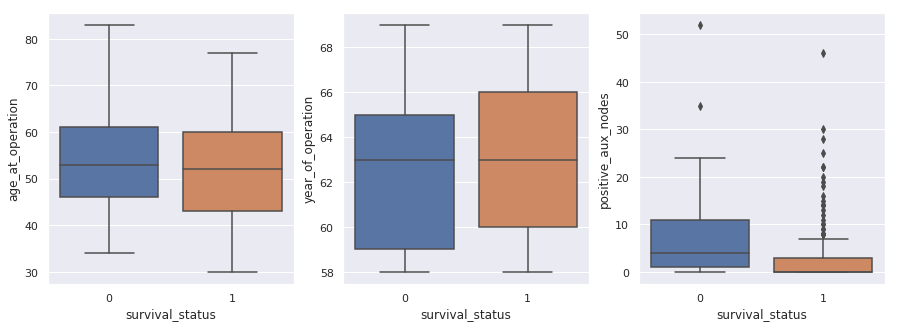

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-2]):
    sns.boxplot( x='survival_status', y=feature, data=df, ax=axes[idx])
plt.show()   

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

There doesn't appear to be any features that have a positive relationship with survival rates. It's possible that there may have been a slight bump in survival rates starting in 1966, but there's not enough data to confidently make that assertion.

- What is at least one feature that looks to have a negative relationship with survival?

The number of positive auxiliary nodes detected seems to have a strongly negative relationship with survival status (i.e., the more nodes detected, the less likely the patient is to survive). The age of the patient at the time of the operation also seems to have a neagtive relationship with survival.

- How are those two features related with each other, and what might that mean?

Age at operation doesn't appear to have a strong relationship with the number of positive auxiliary nodes detected. The number of positive auxiliary nodes detected seemed to have the strongest relationship with survival rates of five years or longer. The vast majority of values for this feature were clustered between zero and five, and you can observe a marked decline in survival rates as you progress through those values



Answer with text, but feel free to intersperse example code/results or refer to it from earlier.